In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
def dataframe():
    r = pd.read_pickle('/Users/nishb/Documents/IX/Internship/returns.pkl')
    r.drop(r.index[0], inplace=True)
    return r

### Insert Model Here

In [10]:
def modelShiftDays(returns, days):
    new_df = returns.shift(days, axis=0)
    return new_df

### Plotting Data

In [ ]:
# For the first listed stock:

# create dataframe for all given days
df = pd.DataFrame()
df['actual'] = returns[returns.columns[0]]
df['predicted'] = df_pred[returns.columns[0]]
df['date'] = returns.index
df.reset_index(drop=True, inplace = True)
df.head()

In [ ]:
sns.lineplot(data=df, x='date', y='actual')
sns.lineplot(data=df, x='date', y='predicted')

In [ ]:
sns.lineplot(data=df, x='actual', y='predicted').set_title('Predicted vs Actual')

In [ ]:
# For the first listed stock:

# create dataframe with all relevant data for first 30 days
df = pd.DataFrame()
df['actual'] = returns[returns.columns[0]].iloc[:30]
df['predicted'] = df_pred[returns.columns[0]].iloc[:30]
df['date'] = returns.index[:30]
df.reset_index(drop=True, inplace = True)
df.head()

In [ ]:
sns.lineplot(data=df, x='date', y='actual')
sns.lineplot(data=df, x='date', y='predicted')

In [ ]:
sns.lineplot(data=df, x='actual', y='predicted').set_title('Predicted vs Actual')

### Testing for Multiple Stocks

In [ ]:
stock = df_pred.iloc[:30, 4]
stock.head()

In [ ]:
daysToShift = 1

# new dataframe after shift
df_pred = modelShiftDays(daysToShift)

df_pred.head()

In [ ]:
def actualRet(returns,numStocks, numDays):
    for i in range(numStocks):
        # create dataframe with all relevant data for first 30 days
        df_actual = pd.DataFrame()
        df_actual['actual'] = returns[returns.columns[i]].iloc[:numDays]
        df_actual['date'] = returns.index[:numDays]
        df.reset_index(drop=True, inplace = True)
        sns.lineplot(data=df_actual, x='date', y='actual')

    df_actualreturn = pd.DataFrame()
    df_actualreturn = returns[returns.columns[0:numStocks]].iloc[:numDays]
    df_actualreturn.head()

In [ ]:
def predRet(df_pred,numStocks,numDays):
    for i in range(numStocks):
        # create dataframe with all relevant data for first 30 days
        df_p= pd.DataFrame()
        df_p['predicted'] = df_pred[returns.columns[i]].iloc[:numDays]
        df_p['date'] = returns.index[:numDays]
        df.reset_index(drop=True, inplace = True)
        sns.lineplot(data=df_p, x='date', y='predicted')

    df_predreturn = pd.DataFrame()
    df_predreturn = df_pred[returns.columns[0:numStocks]].iloc[:numDays]
    df_predreturn.head()

### Getting Top Returns - Single Stock

In [ ]:
df_predreturn.head()

In [ ]:
maxValuesObj = df_predreturn.max(axis=1)
Stock = df_predreturn.idxmax(axis=1)

topReturns = pd.DataFrame()
topReturns['Stock'] = Stock
topReturns['Return'] = maxValuesObj
topReturns.head()

In [ ]:
# save as csv file
topReturns.to_csv('Data/topReturns.csv')

In [ ]:
df_predreturn = df_predreturn.transpose()
df_predreturn.head()

### Getting Top Returns - Multiple Stocks

In [3]:
# coding purposes only
returns = pd.read_pickle('Data/returns.pkl')
returns.drop(returns.index[0], inplace=True)
df = returns.shift(1, axis=0).transpose()
df.head()

# use df, data shifted by one day, transposed
# df.nlargest(3, df.columns[0])

date,1990-01-03,1990-01-04,1990-01-05,1990-01-08,1990-01-09,1990-01-10,1990-01-11,1990-01-12,1990-01-15,1990-01-16,...,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28
905270,NaN,-0.835165,-0.797872,-2.546917,2.017423,-1.123596,-1.136364,2.022989,-4.236142,0.282353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
921795,NaN,-0.475059,-1.272872,1.531023,-0.873016,-2.962370,-2.145215,0.252951,-3.111859,0.434028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904261,NaN,5.000000,2.380952,-0.372093,0.000000,-0.404606,0.406250,1.151572,-1.538462,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905261,NaN,-0.810537,-1.634321,-1.661475,2.534319,-1.098524,-0.555363,-1.396161,-2.513274,-1.452433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
916328,NaN,0.361421,-0.180060,-1.079730,0.000000,-0.364707,-1.281146,0.926980,-2.018002,-1.309658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
# sorting the stock return by day

date = df.columns[1]
df.sort_values(by=date, ascending=False).head()

# here, Jan 4 stock returns are shown in descending order

date,1990-01-03,1990-01-04,1990-01-05,1990-01-08,1990-01-09,1990-01-10,1990-01-11,1990-01-12,1990-01-15,1990-01-16,...,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28
719630,NaN,14.285714,0.000000,0.000000,0.000000,-12.500000,0.000000,14.285714,-12.500000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
929302,NaN,12.008639,-1.812572,0.000000,-7.266300,0.000000,-1.948327,-1.987041,-2.071397,2.115212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
912131,NaN,10.000000,0.000000,18.181818,7.692308,3.714286,0.000000,-13.774105,0.000000,3.833866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
519803,NaN,10.000000,0.000000,-2.254545,-2.343750,-4.761905,5.000000,0.000000,4.761905,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906394,NaN,7.347166,0.760612,-0.754870,-0.760612,0.766442,-2.280632,1.555495,-1.914891,-0.390702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
# create a new dataframe to add all info

sortedStocks = df.sort_values(by=date, ascending=False)
sortedStocks[df.columns[3]].values[0]
summary = pd.DataFrame(columns=['date'])
summary.set_index(['date'])

-2.5469168900804307

In [133]:
topstock = sortedStocks.index[0]#'719630'
summary['col name'] = topstock
summary

,date,col name


In [ ]:
topstock = sortedStocks.index[0]#'719630'
summary.loc[summary.index[0]] = topstock
summary

In [ ]:
allDays = df.shape[1] #total number of days given by data
numDays = 2 #specify the number of days to check
NStocks = 3 #specify the number of stocks to check for top and bottom returns

summary = pd.DataFrame()

# iterate for number of days to check
for i in range(numDays):
    date = df.columns[i] #is a timestamp
    sortedStocks = df.sort_values(by=date, ascending=False)
    summary[sortedStocks.columns[0]] = []
    
    # iterate for number of number of stocks to check
    for j in range(NStocks):
        topstock = sortedStocks.index[j]
        topreturns = sortedStocks[date].values[j]
        #bottomstock = 
        #bottomreturn = 
        
        # create a new column for each entry
        stockName = 'Top Stock'+str(j)
        returnName = 'Top Return'+str(j)
        summary.loc[summary.index[j], stockName] = topstock
        summary.loc[summary.index[j], returnName] = topreturn
        
    topN_returns[colName] = top
    topdf[df.columns[i]] = topN_returns

topdf.head(2)

In [ ]:
# Additional Notes:
'''
Getting Top Returns - Multiple Stocks 
- Each row is a date
- Columns indicate Top N Stock and Top N Return

- df.nlargest cannot be used in this case


- function needs refining
'''

In [ ]:
#test
date = returns.columns[1]
sortedStocks = returns.sort_values(by=date, ascending=False)
sortedStocks.head()

### Start Multi Here

In [10]:
df = pd.read_pickle('Data/returns.pkl')
df.drop(df.index[0], inplace=True)
returns = df.shift(1, axis=0).transpose()
returns.head()

date,1990-01-03,1990-01-04,1990-01-05,1990-01-08,1990-01-09,1990-01-10,1990-01-11,1990-01-12,1990-01-15,1990-01-16,...,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28
905270,NaN,-0.835165,-0.797872,-2.546917,2.017423,-1.123596,-1.136364,2.022989,-4.236142,0.282353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
921795,NaN,-0.475059,-1.272872,1.531023,-0.873016,-2.962370,-2.145215,0.252951,-3.111859,0.434028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904261,NaN,5.000000,2.380952,-0.372093,0.000000,-0.404606,0.406250,1.151572,-1.538462,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905261,NaN,-0.810537,-1.634321,-1.661475,2.534319,-1.098524,-0.555363,-1.396161,-2.513274,-1.452433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
916328,NaN,0.361421,-0.180060,-1.079730,0.000000,-0.364707,-1.281146,0.926980,-2.018002,-1.309658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
maxValuesObj = returns.max(axis=0)
Stock = returns.idxmax(axis=0)

topReturns = pd.DataFrame()
topReturns['Stock'] = Stock
topReturns['Return'] = maxValuesObj
topReturns.head()

,Stock,Return
date,,
1990-01-03,NaN,NaN
1990-01-04,719630,14.285714
1990-01-05,929776,9.345794
1990-01-08,912131,18.181818
1990-01-09,755187,7.812500


### DataFrame with top and bottom stocks and returns

In [198]:
# NOTES:

top = returns.nlargest(4, returns.columns[1])
# df with descending returns for 2nd day

top[top.columns[1]].index.tolist()
# gives ['719630', '929302', '912131', '519803']

bottom = returns.nsmallest(4, returns.columns[1])
# same as above but for lowest returns

returns.columns[1]
toAddReturns = top[  top.columns[1]  ].tolist()
toAddReturns
# gives [14.28571428571428, 12.008639308855273, 10.000000000000009, 10.000000000000009]

[14.28571428571428, 12.008639308855273, 10.000000000000009, 10.000000000000009]

In [232]:
returns.head()

date,1990-01-03,1990-01-04,1990-01-05,1990-01-08,1990-01-09,1990-01-10,1990-01-11,1990-01-12,1990-01-15,1990-01-16,...,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-24,2021-05-25,2021-05-26,2021-05-27,2021-05-28
905270,NaN,-0.835165,-0.797872,-2.546917,2.017423,-1.123596,-1.136364,2.022989,-4.236142,0.282353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
921795,NaN,-0.475059,-1.272872,1.531023,-0.873016,-2.962370,-2.145215,0.252951,-3.111859,0.434028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904261,NaN,5.000000,2.380952,-0.372093,0.000000,-0.404606,0.406250,1.151572,-1.538462,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905261,NaN,-0.810537,-1.634321,-1.661475,2.534319,-1.098524,-0.555363,-1.396161,-2.513274,-1.452433,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
916328,NaN,0.361421,-0.180060,-1.079730,0.000000,-0.364707,-1.281146,0.926980,-2.018002,-1.309658,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [234]:
numStocks = 2
numDays = 4
# uses returns as initial dataframe


# create new dataframe with all dates as index
listDates = []
for i in range(numDays):
    toClean = str(returns.columns[i])
    day = toClean[:-9]
    listDates.append(day)

results = pd.DataFrame( {'date': listDates, 'del': listDates} )
results.set_index('date', inplace=True)

# iterate for every day
for i in range(1, numDays):
    # dataframes for top and bottom stocks and returns per day
    top = returns.nlargest(numStocks, returns.columns[i])
    bottom = returns.nsmallest(numStocks, returns.columns[i])
    
    day = listDates[i] # set date
    toAddStock = top[  top.columns[1]  ].index.tolist()
    toAddReturn = top[  top.columns[1]  ].tolist()
    
    # fill empty lists with nan's
    if toAddStock==[]:
        toAddStock = np.empty((numStocks))
        toAddStock[:] = np.nan
    
    # iterate for number of stocks to check
    for j in range(numStocks):
        if i==1:
            # set names of columns
            topStockColName = 'Top Stock ' + str(j+1)
            topReturnColName = 'Top Return ' + str(j+1)
 
            if j==0:
                # remove initial column placeholder
                results.drop(columns=['del'], inplace=True)
        #needs update
        results.loc[day, topStockColName] = toAddStock[j]
        results.loc[day, topReturnColName] = toAddReturn[j]
        
    
results.head()

,Top Stock 1,Top Return 1,Top Stock 2,Top Return 2
date,,,,
1990-01-03,NaN,NaN,NaN,NaN
1990-01-04,719630,14.285714,929302,12.008639
1990-01-05,NaN,NaN,512785,0.000000
1990-01-08,NaN,NaN,938928,0.000000


In [213]:
def stocks(df, numStocks, numDays):
    '''
    Function takes argument dataframe in format: rows = stocks, col = dates, values = returns
    Also takes arguments number of stocks and days to check for
    Returns dataframe with top and bottom stocks and their returns as dataframe results
    '''
    # create new dataframe with all dates as index
    listDates = []
    for i in range(numDays):
        toClean = str(returns.columns[i])
        day = toClean[:-9]
        listDates.append(day)

    results = pd.DataFrame( {'date': listDates, 'del': listDates} )
    results.set_index('date', inplace=True)

    # iterate for every day
    for i in range(1, numDays):
        # dataframes for top and bottom stocks and returns per day
        top = returns.nlargest(numStocks, returns.columns[i])
        bottom = returns.nsmallest(numStocks, returns.columns[i])

        day = listDates[i] # set date
        toAddStock = top[  top.columns[1]  ].index.tolist()
        toAddReturn = top[  top.columns[1]  ].tolist()

        # fill empty lists with nan's
        if toAddStock==[]:
            toAddStock = np.empty((numStocks))
            toAddStock[:] = np.nan

        # iterate for number of stocks to check
        for j in range(numStocks):
            if i==1:
                # set names of columns
                topStockColName = 'Top Stock ' + str(j+1)
                topReturnColName = 'Top Return ' + str(j+1)

                if j==0:
                    # remove initial column placeholder
                    results.drop(columns=['del'], inplace=True)
            print(toAddStock[j], day)
            #problem:
            results.loc[day, topStockColName] = toAddStock[j]
            results.loc[day, topReturnColName] = toAddReturn[j]

    # return the final dataframe
    return results

In [ ]:
# call function
stocks(df, numStocks, numDays)

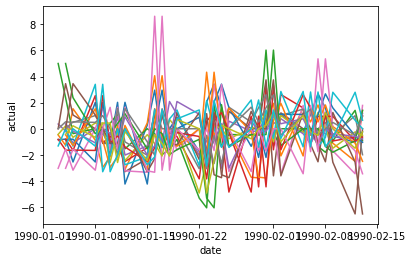

In [35]:
if __name__ == "__main__":
    numStocks = 10
    daysToShift = 1
    numDays = 30

    returns = dataframe()

    # new dataframe after shift
    df_pred = modelShiftDays(returns, daysToShift)

    actualRet(returns, numStocks, numDays)
    predRet(df_pred, numStocks, numDays)
    
    '''
    df = pd.read_pickle('Data/returns.pkl')
    df.drop(df.index[0], inplace=True)
    returns = df.shift(1, axis=0).transpose()
    stocks(returns, numStocks, numDays)
    '''
